In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [22]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

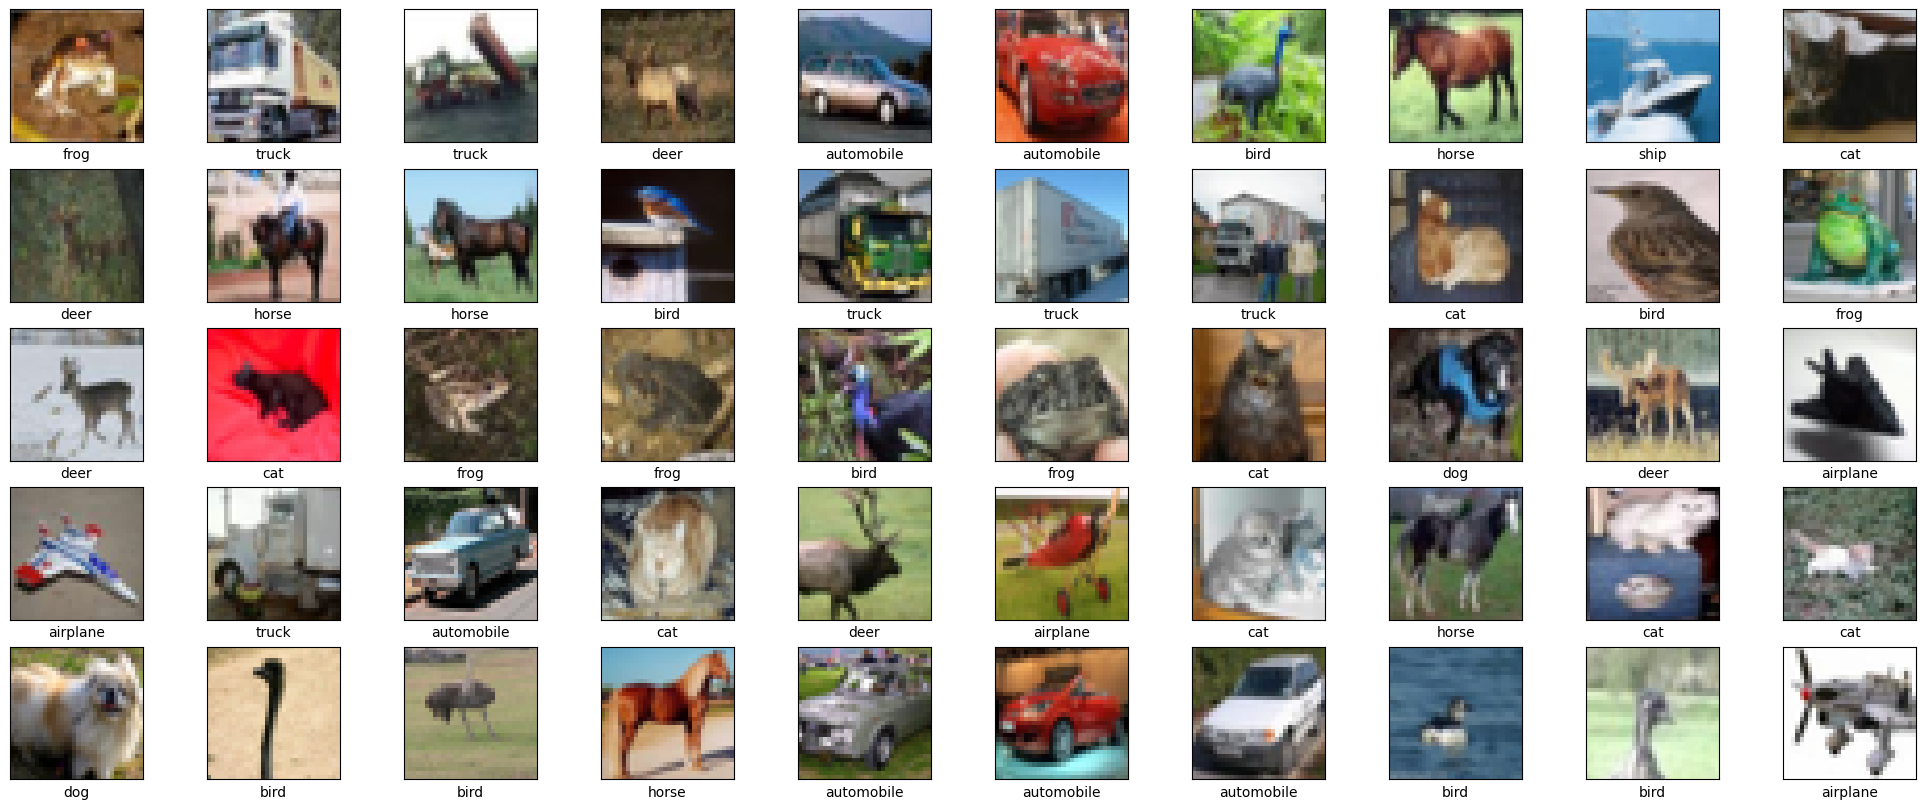

In [ ]:
plt.figure(figsize=(25,10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()



In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Build the CNN model
model = keras.Sequential()

# input layer
keras.Input(shape=(32,32,3)),

#Convolutional
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


# Flatten the 2D feature maps to 1D
model.add(layers.Flatten())

# Connected Layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 32)       1

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# CNN model with L1 regularization
model_l1 = keras.Sequential()

# Convolutional Layers
model_l1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.25))

model_l1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.25))


# Flatten the 2D feature maps to 1D
model_l1.add(layers.Flatten())

#Connected Layers
model_l1.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Dropout(0.25))
model_l1.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 32)      

In [ ]:
model_l1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# CNN model with L2 regularization
model_l2 = keras.Sequential()

# Convolutional
model_l2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.25))

model_l2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.25))


# Flatten the 2D feature maps to 1D
model_l2.add(layers.Flatten())

#Connected Layers
model_l2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Dropout(0.25))
model_l2.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 30, 30, 32)      

In [ ]:
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
epochs = 20

In [ ]:
model_trained = model
h = model.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 24s 16ms/step - loss: 1.4751 - accuracy: 0.4800 - val_loss: 1.1767 - val_accuracy: 0.5835
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 1.0169 - accuracy: 0.6438 - val_loss: 0.9103 - val_accuracy: 0.6786
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 0.8533 - accuracy: 0.7016 - val_loss: 0.7857 - val_accuracy: 0.7280
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 0.7621 - accuracy: 0.7313 - val_loss: 0.8175 - val_accuracy: 0.7146
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 0.6927 - accuracy: 0.7584 - val_loss: 0.7112 - val_accuracy: 0.7473
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.6345 - accuracy: 0.7773 - val_loss: 0.7908 - val_accuracy: 0.7267
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 0.5869 - accuracy: 0.7945 - val_loss: 0.6101 - val_accuracy: 0.789

In [23]:
h_trained = model_trained.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 9s 13ms/step - loss: 0.1787 - accuracy: 0.9363 - val_loss: 0.6235 - val_accuracy: 0.8323
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 0.1623 - accuracy: 0.9414 - val_loss: 0.6114 - val_accuracy: 0.8375
Epoch 3/20
625/625 [==============================] - 11s 17ms/step - loss: 0.1525 - accuracy: 0.9456 - val_loss: 0.6309 - val_accuracy: 0.8301
Epoch 4/20
625/625 [==============================] - 9s 14ms/step - loss: 0.1518 - accuracy: 0.9456 - val_loss: 0.6652 - val_accuracy: 0.8294
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 0.1489 - accuracy: 0.9474 - val_loss: 0.6267 - val_accuracy: 0.8374
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.1457 - accuracy: 0.9466 - val_loss: 0.6293 - val_accuracy: 0.8375
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 0.1407 - accuracy: 0.9513 - val_loss: 0.6440 - val_accuracy: 0.835

In [24]:
model_l1_trained = model_l1
h1 = model_l1.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 12s 18ms/step - loss: 3.4824 - accuracy: 0.5109 - val_loss: 5.6675 - val_accuracy: 0.0952
Epoch 2/20
625/625 [==============================] - 11s 18ms/step - loss: 3.3771 - accuracy: 0.5146 - val_loss: 5.4613 - val_accuracy: 0.1014
Epoch 3/20
625/625 [==============================] - 10s 17ms/step - loss: 3.3793 - accuracy: 0.5242 - val_loss: 5.1939 - val_accuracy: 0.1014
Epoch 4/20
625/625 [==============================] - 11s 17ms/step - loss: 3.3595 - accuracy: 0.5248 - val_loss: 5.2640 - val_accuracy: 0.1003
Epoch 5/20
625/625 [==============================] - 13s 21ms/step - loss: 3.3073 - accuracy: 0.5308 - val_loss: 4.6688 - val_accuracy: 0.0952
Epoch 6/20
625/625 [==============================] - 13s 20ms/step - loss: 3.2993 - accuracy: 0.5316 - val_loss: 4.7031 - val_accuracy: 0.0952
Epoch 7/20
625/625 [==============================] - 11s 17ms/step - loss: 3.2788 - accuracy: 0.5282 - val_loss: 4.6936 - val_accuracy:

In [27]:
h1_trained = model_l1_trained.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 11s 17ms/step - loss: 3.2177 - accuracy: 0.5402 - val_loss: 3.1953 - val_accuracy: 0.5590
Epoch 2/20
625/625 [==============================] - 10s 17ms/step - loss: 3.1905 - accuracy: 0.5419 - val_loss: 3.1033 - val_accuracy: 0.5584
Epoch 3/20
625/625 [==============================] - 11s 18ms/step - loss: 3.2169 - accuracy: 0.5410 - val_loss: 3.2397 - val_accuracy: 0.5334
Epoch 4/20
625/625 [==============================] - 11s 18ms/step - loss: 3.1684 - accuracy: 0.5401 - val_loss: 3.0748 - val_accuracy: 0.5702
Epoch 5/20
625/625 [==============================] - 11s 17ms/step - loss: 3.1781 - accuracy: 0.5375 - val_loss: 3.1722 - val_accuracy: 0.5556
Epoch 6/20
625/625 [==============================] - 11s 17ms/step - loss: 3.1776 - accuracy: 0.5400 - val_loss: 3.1843 - val_accuracy: 0.5189
Epoch 7/20
625/625 [==============================] - 11s 18ms/step - loss: 3.1676 - accuracy: 0.5418 - val_loss: 3.3906 - val_accuracy:

In [26]:
model_l2_trained = model_l2
h2 = model_l2.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 18s 19ms/step - loss: 4.7731 - accuracy: 0.4819 - val_loss: 2.5498 - val_accuracy: 0.5602
Epoch 2/20
625/625 [==============================] - 10s 17ms/step - loss: 1.9779 - accuracy: 0.6282 - val_loss: 1.8478 - val_accuracy: 0.5944
Epoch 3/20
625/625 [==============================] - 12s 20ms/step - loss: 1.6475 - accuracy: 0.6610 - val_loss: 1.6740 - val_accuracy: 0.6426
Epoch 4/20
625/625 [==============================] - 12s 19ms/step - loss: 1.6003 - accuracy: 0.6718 - val_loss: 1.5987 - val_accuracy: 0.6799
Epoch 5/20
625/625 [==============================] - 11s 17ms/step - loss: 1.5981 - accuracy: 0.6754 - val_loss: 2.0382 - val_accuracy: 0.5649
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 1.5753 - accuracy: 0.6873 - val_loss: 1.7073 - val_accuracy: 0.6396
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 1.5798 - accuracy: 0.6889 - val_loss: 1.6010 - val_accuracy:

In [28]:
h2_trained = model_l2_trained.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 11s 18ms/step - loss: 1.3556 - accuracy: 0.7303 - val_loss: 1.3745 - val_accuracy: 0.7163
Epoch 2/20
625/625 [==============================] - 11s 18ms/step - loss: 1.3541 - accuracy: 0.7287 - val_loss: 1.6713 - val_accuracy: 0.6126
Epoch 3/20
625/625 [==============================] - 11s 18ms/step - loss: 1.3393 - accuracy: 0.7339 - val_loss: 1.5752 - val_accuracy: 0.6477
Epoch 4/20
625/625 [==============================] - 11s 17ms/step - loss: 1.3339 - accuracy: 0.7292 - val_loss: 1.3241 - val_accuracy: 0.7358
Epoch 5/20
625/625 [==============================] - 11s 17ms/step - loss: 1.3199 - accuracy: 0.7333 - val_loss: 1.4004 - val_accuracy: 0.7059
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 1.3102 - accuracy: 0.7365 - val_loss: 1.3862 - val_accuracy: 0.7088
Epoch 7/20
625/625 [==============================] - 11s 17ms/step - loss: 1.3125 - accuracy: 0.7315 - val_loss: 1.5123 - val_accuracy:

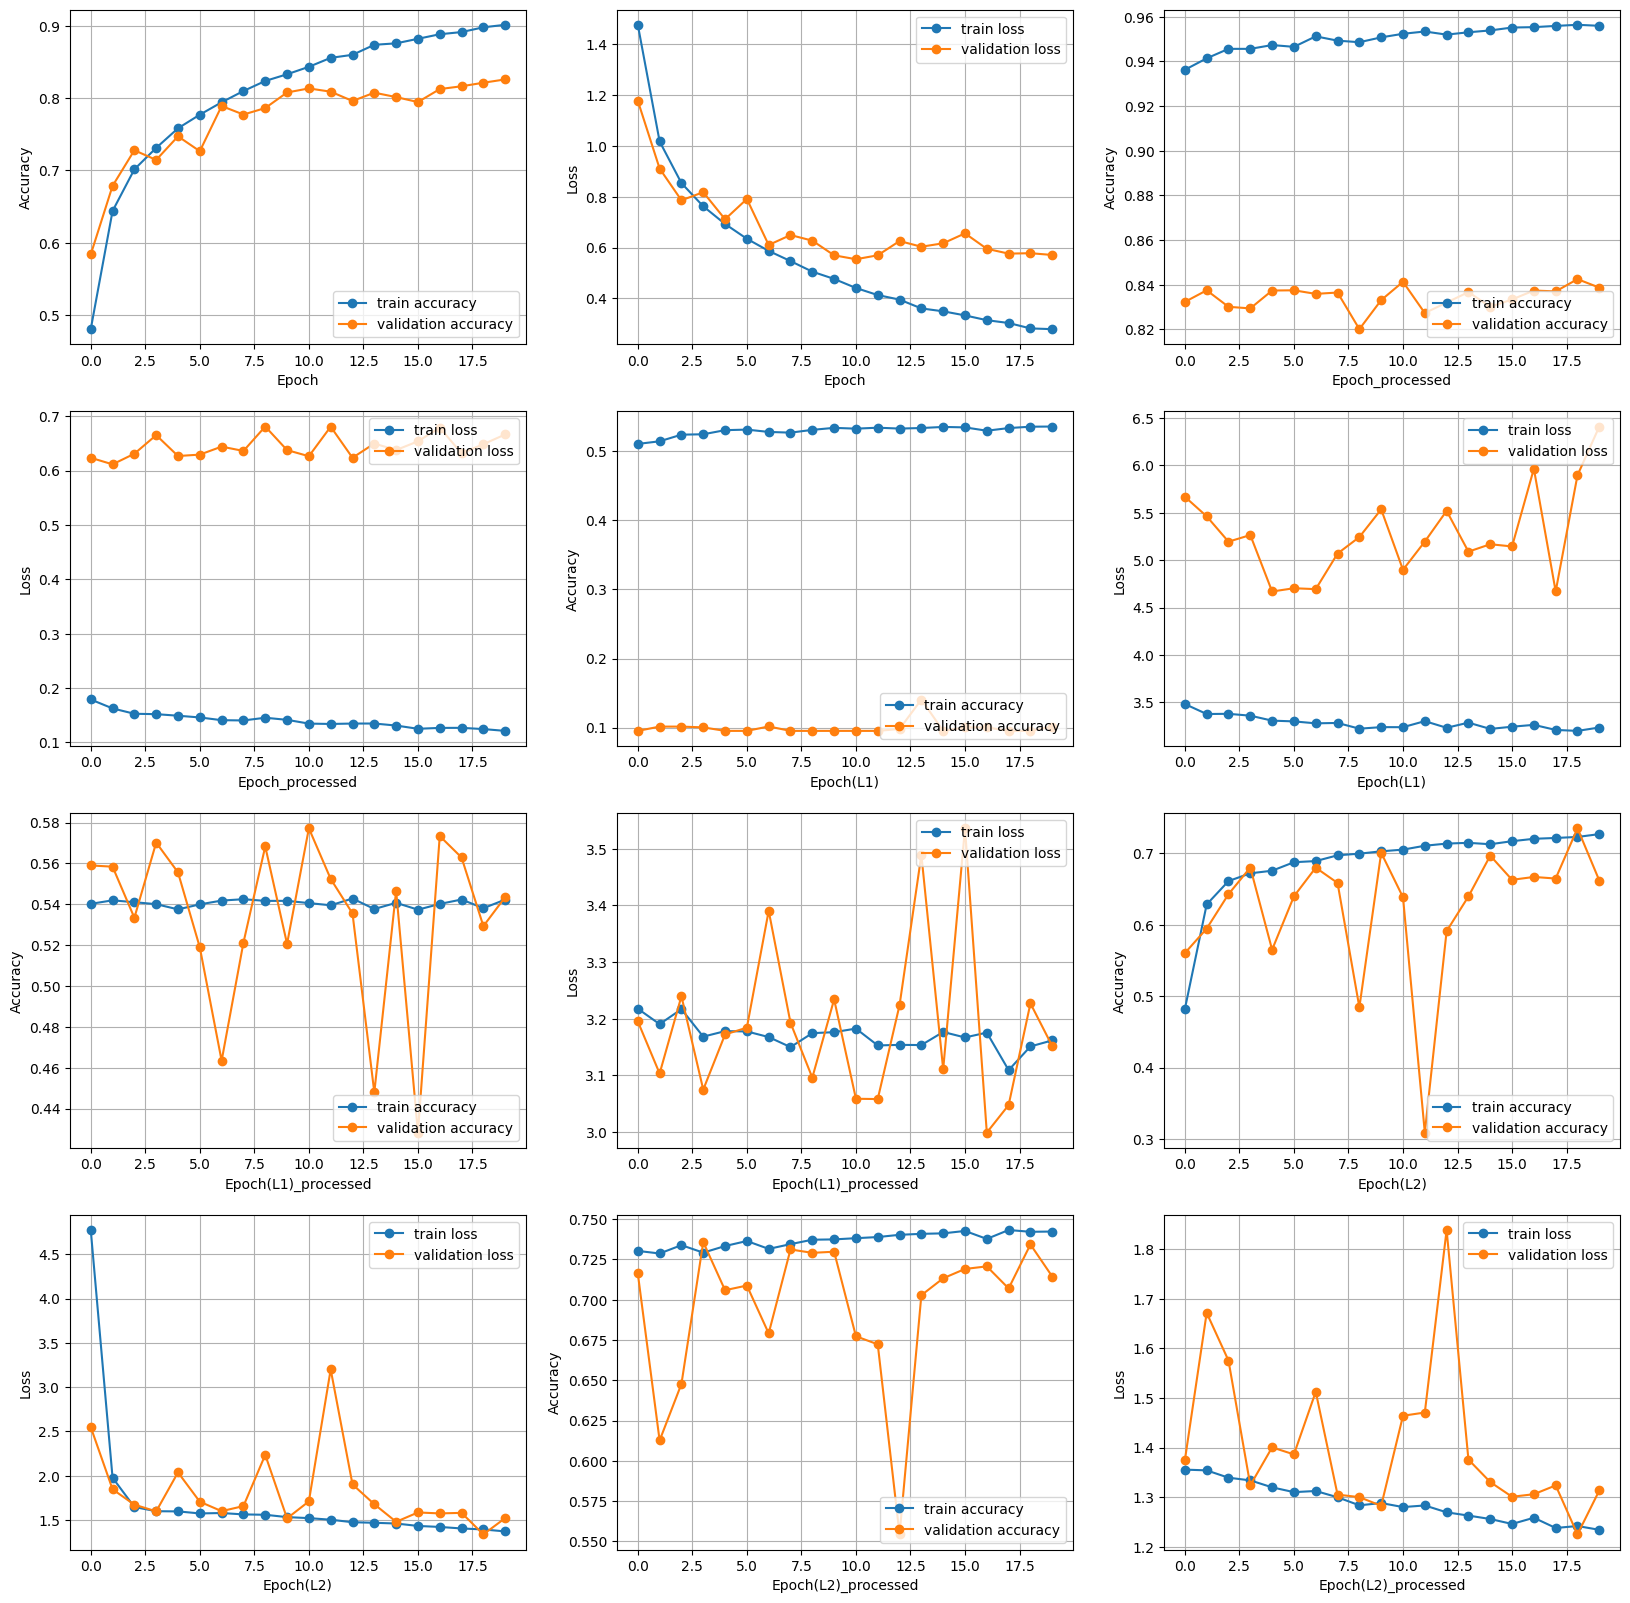

In [36]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(4,3,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(4,3,3)
plt.plot(h_trained.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_trained.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(4,3,4)
plt.plot(h_trained.history['loss'], 'o-', label='train loss')
plt.plot(h_trained.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(4,3,5)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(4,3,6)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(4,3,7)
plt.plot(h1_trained.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_trained.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(4,3,8)
plt.plot(h1_trained.history['loss'], 'o-', label='train loss')
plt.plot(h1_trained.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(4,3,9)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(4,3,10)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(4,3,11)
plt.plot(h2_trained.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_trained.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(4,3,12)
plt.plot(h2_trained.history['loss'], 'o-', label='train loss')
plt.plot(h2_trained.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [37]:
#L1,L2 regularization technique

test_accuracy, test_loss = model.evaluate(X_test, Y_test)
test_accuracy_trained, test_loss_trained = model_trained.evaluate(X_test, Y_test)
test_accuracy_l1, test_loss_l1 = model_l1.evaluate(X_test, Y_test)
test_accuracy_l1_trained, test_loss_l1_trained = model_l1_trained.evaluate(X_test, Y_test)
test_accuracy_l2, test_loss_l2 = model_l2.evaluate(X_test, Y_test)
test_accuracy_l2_trained, test_loss_l2_trained = model_l2_trained.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3492 - accuracy: 0.7013


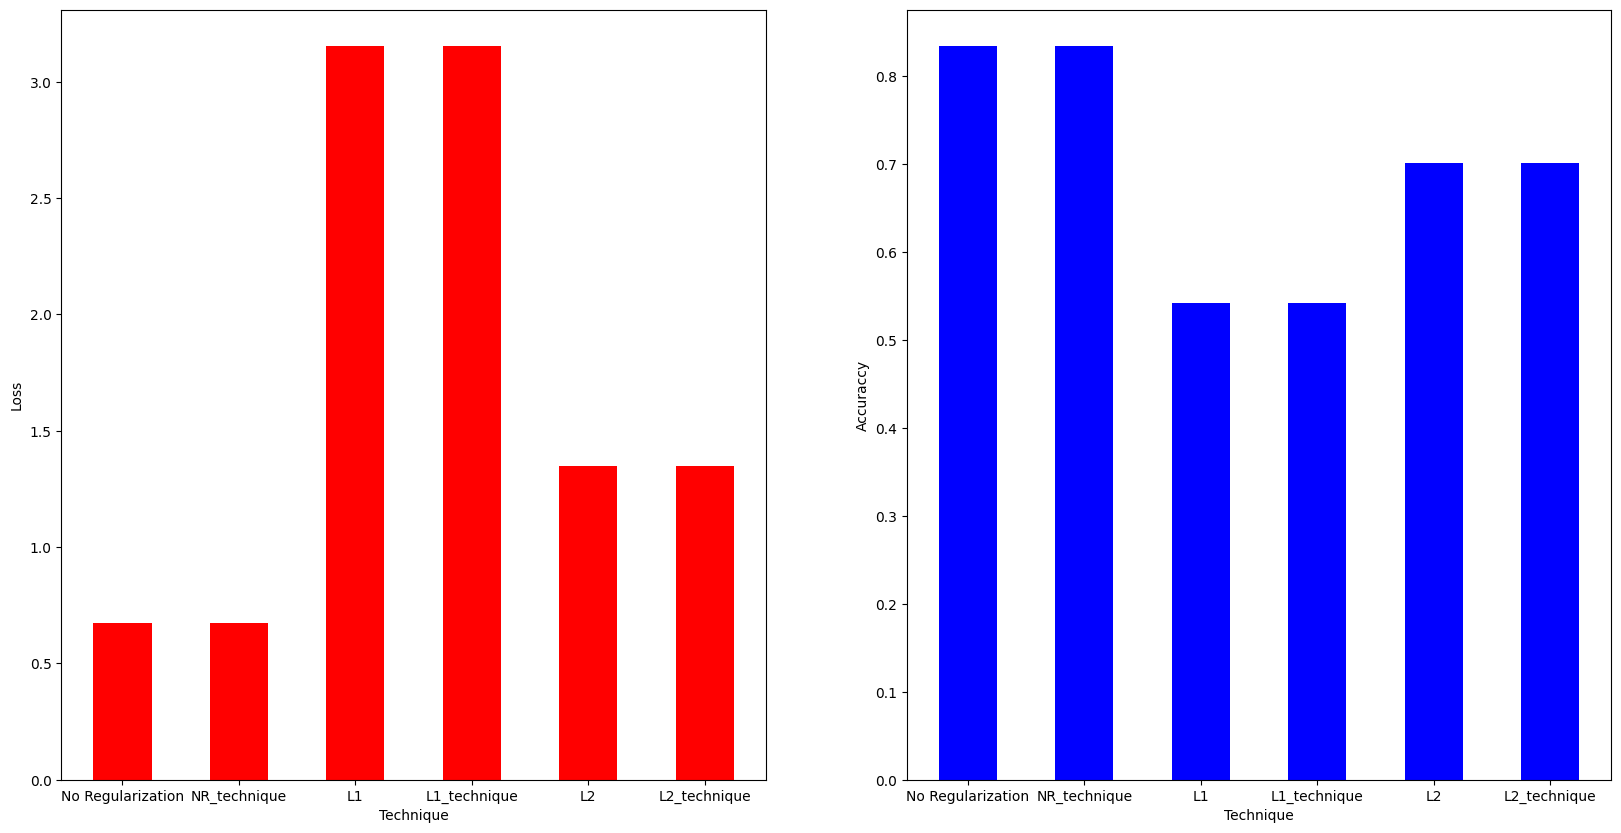

In [48]:
plt.figure(figsize=(20,10))

x = np.arange(6)
y1 = [test_loss, test_loss, test_loss_l1, test_loss_l1, test_loss_l2, test_loss_l2]
y2 = [test_accuracy, test_accuracy, test_accuracy_l1, test_accuracy_l1, test_accuracy_l2, test_accuracy_l2]
width = 0.50

plt.subplot(1,2,1)
plt.bar(x, y2, width, color='red')
plt.xticks(x, ['No Regularization', 'NR_technique', 'L1', 'L1_technique', 'L2', 'L2_technique'])
plt.xlabel("Technique")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.bar(x, y1, width, color='blue')
plt.xticks(x, ['No Regularization', 'NR_technique', 'L1', 'L1_technique', 'L2', 'L2_technique'])
plt.xlabel("Technique")
plt.ylabel("Accuraccy")
plt.show()